In [58]:
import numpy as np
import json

In [59]:
with open('points_table.json') as f:
    points_table = json.load(f)

def time_to_secs(time):
    if time == '-':
        return np.nan
    denoms = time.split(':')
    factors = 60 ** np.arange(len(denoms))[::-1]
    return round(np.sum([float(denom) * factor for denom, factor in zip(denoms, factors)]),2)

points_table['Women'].keys()

dict_keys(['100m', '200m', '300m', '400m', '500m', '100mH', '400mH', '4x100m', '4x200m', '4x400m', '600m', '800m', '1000m', '1500m', 'Mile', '2000m', '2000mSC', '3000m', '3000mSC', '2 Miles', '5000m', '10,000m', '5km', '10km', '15km', '10 Miles', '20km', 'HM', '25km', '30km', 'Marathon', '100km', '3kmW', '5kmW', '10kmW', '15kmW', '20kmW', '30kmW', '35kmW', '50kmW', '3000mW', '5000mW', '10,000mW', '15,000mW', '20,000mW', '30,000mW', '35,000mW', '50,000mW', 'HJ', 'PV', 'LJ', 'TJ', 'SP', 'DT', 'HT', 'JT', 'Heptathlon'])

In [60]:
# categorize events
track_events = ['100m', '200m', '300m', '400m', '500m', '600m', '800m', '1000m', '1500m', 'Mile', '2000m', '3000m', '2 Miles', '5000m', '10,000m']
road_events = ['5km', '10km', '15km', '10 Miles', '20km', 'HM', '25km', '30km', 'Marathon', '100km']
hurdle_events = ['100mH', '110mH', '400mH', '2000mSC', '3000mSC']
track_walk_events = ['3000mW', '5000mW', '10,000mW', '15,000mW', '20,000mW', '30,000mW', '35,000mW', '50,000mW']
road_walk_events = ['3kmW', '5kmW', '10kmW', '15kmW', '20kmW', '30kmW', '35kmW', '50kmW']
relay_events = ['4x100m', '4x200m', '4x400m']
field_events = ['HJ', 'PV', 'LJ', 'TJ', 'SP', 'DT', 'HT', 'JT']
combined_events = ['Heptathlon', 'Decathlon']

# map distances to events
mile_to_km = 1.60934
marathon_to_km = 42.195
distance_map = {'100m':0.1,
                '200m':0.2, 
                '300m':0.3, 
                '400m':0.4, 
                '500m':0.5, 
                '600m':0.6, 
                '800m':0.8, 
                '1000m':1, 
                '1500m':1.5, 
                'Mile':mile_to_km, 
                '2000m':2, 
                '3000m':3, 
                '2 Miles':2*mile_to_km, 
                '5000m':5, 
                '10,000m':10,
                '5km':5,
                '10km':10,
                '15km':15,
                '10 Miles':10*mile_to_km,
                '20km':20,
                'HM':0.5*marathon_to_km,
                '25km':25,
                '30km':30,
                'Marathon':marathon_to_km,
                '100km':100,
                '100mH':0.1,
                '110mH':0.11,
                '400mH':0.4,
                '2000mSC':2,
                '3000mSC':3,
                '3000mW':3,
                '5000mW':5,
                '10,000mW':10,
                '15,000mW':15,
                '20,000mW':20,
                '30,000mW':30,
                '35,000mW':35,
                '50,000mW':50,
                '3kmW':3,
                '5kmW':5,
                '10kmW':10,
                '15kmW':15,
                '20kmW':20,
                '30kmW':30,
                '35kmW':35,
                '50kmW':50,
                '4x100m':0.4,
                '4x200m':0.8,
                '4x400m':1.6,
                }

restructured_points_table = {'Points':[int(x) for x in points_table['Points']], 'Men':{}, 'Women':{}}
for gender in ['Men', 'Women']:
    for category in ['Track', 'Road', 'Hurdle', 'Track_Walk', 'Road_Walk', 'Relay', 'Field', 'Combined']:
        restructured_points_table[gender][category] = {}
        for event in eval(category.lower() + '_events'):
            if event in points_table[gender].keys():
                restructured_points_table[gender][category][event] = {}
                if category in ['Field', 'Combined']:
                    restructured_points_table[gender][category][event]['Data'] = [np.nan if x == '-' else float(x) for x in points_table[gender][event]]
                else:
                    restructured_points_table[gender][category][event]['Data'] = [time_to_secs(x)-0.005 for x in points_table[gender][event]]
                    restructured_points_table[gender][category][event]['Distance'] = distance_map[event]
                mask = [not np.isnan(x) for x in restructured_points_table[gender][category][event]['Data']]
                filtered_data = np.array(restructured_points_table[gender][category][event]['Data'])[mask]
                filtered_points = np.array(restructured_points_table['Points'])[mask]
                fit_data = np.polyfit(filtered_data, filtered_points, 2)
                inv_fit = (-fit_data[1]+np.sqrt(fit_data[1]**2-4*fit_data[0]*fit_data[2]))/(2*fit_data[0])
                restructured_points_table[gender][category][event]['Fit'] = fit_data
                restructured_points_table[gender][category][event]['Inv_Fit'] = inv_fit

C:\Users\tbwil\AppData\Local\Temp\ipykernel_13980\2362984661.py:81: RuntimeWarning: invalid value encountered in sqrt
  inv_fit = (-fit_data[1]+np.sqrt(fit_data[1]**2-4*fit_data[0]*fit_data[2]))/(2*fit_data[0])


Select data

In [61]:
# input data
gender = 'Men'
category = 'Track_Walk'
event = '15,000mW'
time = '1:08:35.68'

# compute points
seconds = time_to_secs(time)
points = np.polyval(restructured_points_table[gender][category][event]['Fit'], seconds)
print(int(points))

926


In [62]:
# input data
gender = 'Men'
category = 'Road'
event = '5km'
time = '18:00'

# compute points
seconds = time_to_secs(time)
points = np.polyval(restructured_points_table[gender][category][event]['Fit'], seconds)
print(int(points))

359


In [63]:
# input data
gender = 'Men'
category = 'Track'
event = '10,000m'
time = '30:00'

# compute points
seconds = time_to_secs(time)
points = np.polyval(restructured_points_table[gender][category][event]['Fit'], seconds)
print(int(points))

954


In [64]:
# input data
gender = 'Women'
category = 'Road'
event = '10km'
time = '1:00:00'

# compute points
seconds = time_to_secs(time)
points = np.polyval(restructured_points_table[gender][category][event]['Fit'], seconds)
print(int(points))

138


Ideas of potential features:
- Interpolate the running event data
- Extrapolate and interpolate the walks data
- Account for all weights in the throws by using a factor of $\frac{1}{m}$
- Automatically account for wind in the jumps and sprints
- Account for the elevation in the road events
- Account for hand timing
- Explore relationship between relays and individual events
- See what events are in the indoor list but not in the outdoor list
- Look at JD or youth/junior multi-event scores to get an idea how the different weights or hurdle heights compare

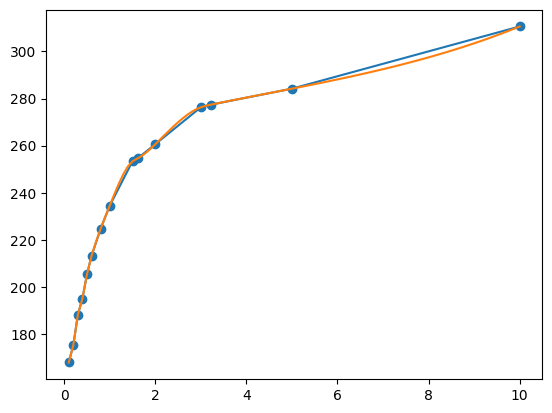

In [65]:
import matplotlib.pyplot as plt
import scipy.interpolate as spi

gender = 'Men'
distance = 1.2

# for p in restructured_points_table['Points']:
distance_data = []
time_data = []
for event in restructured_points_table[gender]['Track'].keys():
    if not np.isnan(restructured_points_table[gender]['Track'][event]['Data'][-1]):
        distance_data.append(restructured_points_table[gender]['Track'][event]['Distance'])
        time_data.append(restructured_points_table[gender]['Track'][event]['Data'][-1])

pace_data = [time_data[x]/distance_data[x] for x in range(len(time_data))]
cs_fit = spi.CubicSpline(distance_data, pace_data)

start = 0
end = 15
span = np.linspace(distance_data[start], distance_data[end-1], 100)
plt.scatter(distance_data[start:end], pace_data[start:end])
plt.plot(distance_data[start:end], pace_data[start:end])
plt.plot(span, cs_fit(span))
plt.show()

In [66]:
import matplotlib.pyplot as plt
import scipy.interpolate as spi

gender = 'Men'
surface = 'Track'
distance = 8
time = '29:51.8'

interp_points = []
for point in range(1400):
    distance_data = []
    time_data = []
    for event in restructured_points_table[gender][surface].keys():
        if not np.isnan(restructured_points_table[gender][surface][event]['Data'][point]):
            distance_data.append(restructured_points_table[gender][surface][event]['Distance'])
            time_data.append(restructured_points_table[gender][surface][event]['Data'][point])
    cs_fit = spi.CubicSpline(distance_data, time_data)
    interp_points.append(cs_fit(distance))
quad_fit = np.polyfit(interp_points, range(1,1401)[::-1], 2)
seconds = time_to_secs(time)
score = np.polyval(quad_fit, seconds)
print(int(score))

368


In [67]:
# Testing how well it works
import scipy.interpolate as spi

gender = 'Women'
surface = 'Track'
distance = 3.8
time = '22:50.38'

interp_points = []
for point in range(1400):
    distance_data = []
    time_data = []
    for event in restructured_points_table[gender][surface].keys():
        if not np.isnan(restructured_points_table[gender][surface][event]['Data'][point]):
            distance_data.append(restructured_points_table[gender][surface][event]['Distance'])
            time_data.append(restructured_points_table[gender][surface][event]['Data'][point])
    cs_fit = spi.CubicSpline(distance_data, time_data)
    interp_points.append(cs_fit(distance))
quad_fit = np.polyfit(interp_points, range(1,1401)[::-1], 2)
seconds = time_to_secs(time)
score = np.polyval(quad_fit, seconds)
print(int(score))

50


In [68]:
import matplotlib.pyplot as plt
import scipy.interpolate as spi

gender = 'Men'
distance = 5
time = '15:00'

interp_points = []
for point in range(1400):
    distance_data = []
    time_data = []
    for event in restructured_points_table[gender]['Track'].keys():
        if not np.isnan(restructured_points_table[gender]['Track'][event]['Data'][point]):
            event_dist = restructured_points_table[gender]['Track'][event]['Distance']
            event_time = restructured_points_table[gender]['Track'][event]['Data'][point]
            road_time5 = np.polyval(restructured_points_table[gender]['Road']['5km']['Inv_Fit'], 1400-point)
            road_time10 = np.polyval(restructured_points_table[gender]['Road']['10km']['Inv_Fit'], 1400-point)
            road_ratio5 = road_time5/restructured_points_table[gender]['Track']['5000m']['Data'][point]
            road_ratio10 = road_time10/restructured_points_table[gender]['Track']['10,000m']['Data'][point]
            ratio_fit = np.polyfit([5,10], [road_ratio5, road_ratio10], 1)
            event_road_ratio = np.polyval(ratio_fit, event_dist)
            distance_data.append(event_dist)
            time_data.append(event_time*event_road_ratio)
    cs_fit = spi.CubicSpline(distance_data, time_data)
    interp_points.append(cs_fit(distance))
quad_fit = np.polyfit(interp_points, range(1,1401)[::-1], 2)
seconds = time_to_secs(time)
score = np.polyval(quad_fit, seconds)
print(int(score))

TypeError: iteration over a 0-d array

In [69]:
import scipy.interpolate as spi

gender = 'Women'
distance = 10
time = '1:02:56'

interp_points = []
for point in range(1400):
    distance_data = []
    time_data = []
    for event in restructured_points_table[gender]['Track'].keys():
        if not np.isnan(restructured_points_table[gender]['Track'][event]['Data'][point]):
            event_dist = restructured_points_table[gender]['Track'][event]['Distance']
            event_time = restructured_points_table[gender]['Track'][event]['Data'][point]
            road_time5 = np.polyval(restructured_points_table[gender]['Road']['5km']['Inv_Fit'], 1400-point)
            road_time10 = np.polyval(restructured_points_table[gender]['Road']['10km']['Inv_Fit'], 1400-point)
            road_ratio5 = road_time5/restructured_points_table[gender]['Track']['5000m']['Data'][point]
            road_ratio10 = road_time10/restructured_points_table[gender]['Track']['10,000m']['Data'][point]
            ratio_fit = np.polyfit([5,10], [road_ratio5, road_ratio10], 1)
            event_road_ratio = np.polyval(ratio_fit, event_dist)
            distance_data.append(event_dist)
            time_data.append(event_time*event_road_ratio)
    cs_fit = spi.CubicSpline(distance_data, time_data)
    interp_points.append(cs_fit(distance))
quad_fit = np.polyfit(interp_points, range(1,1401)[::-1], 2)
seconds = time_to_secs(time)
score = np.polyval(quad_fit, seconds)
print(int(score))

TypeError: iteration over a 0-d array

Interpolate Racewalk

In [79]:
gender = "Men"
point = 957

distances = []
max_times = []
null_times = []
for event in restructured_points_table[gender]["Track_Walk"].keys():
    fits = restructured_points_table[gender]["Track_Walk"][event]["Fit"]
    max_times.append(-fits[1]/(2*fits[0]) - np.sqrt(fits[1]**2-4*fits[0]*(fits[2]-1400))/(2*fits[0]))
    null_times.append(-fits[1]/(2*fits[0]))
    distances.append(restructured_points_table[gender]["Track_Walk"][event]["Distance"])

In [80]:
null_times, distances

([1604.9907021016047,
  2699.9905843690644,
  5549.989930688294,
  8429.990131773067,
  11399.989876310783,
  19109.990729579462,
  22799.990650548167,
  37199.99011271565],
 [3, 5, 10, 15, 20, 30, 35, 50])

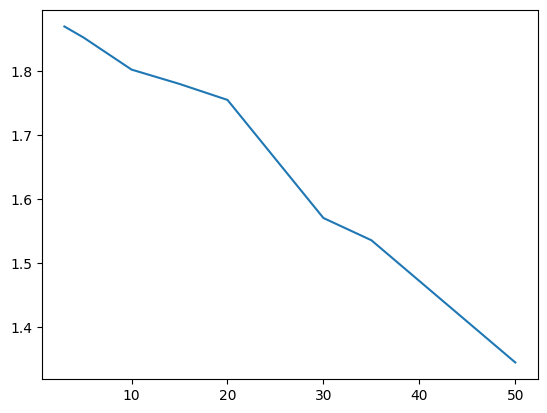

In [91]:
v_null = np.array(distances) / np.array(null_times) * 1000
v_max = np.array(distances) / np.array(max_times) * 1000

plt.plot(distances, v_null)

[ 0.49039192  0.02637196 -0.47875391  4.78184372]


C:\Users\tbwil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


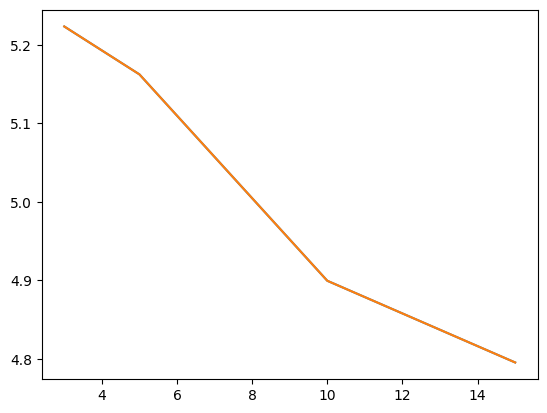

In [137]:
import scipy.optimize as spo
n_points = 4

def f(x, a, b, c, d):
    return a/(1+b*np.exp(-c*x)) + d

popt_max, pcov = spo.curve_fit(f, distances[:n_points], v_max[:n_points], p0=[1, 0.1, 0.1, 5])

print(popt_max)

plt.plot(distances[:n_points], v_max[:n_points])
plt.plot(distances[:n_points], f(np.array(distances[:n_points]), *popt_max))
plt.show()

[ 0.12122213  0.09117314 -0.35840132  1.77350764]


C:\Users\tbwil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


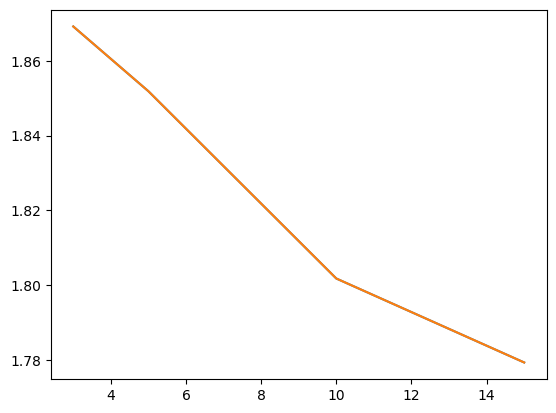

In [139]:
popt_null, pcov = spo.curve_fit(f, distances[:n_points], v_null[:n_points], p0=[1, 0.1, 0.1, 5])

print(popt_null)

plt.plot(distances[:n_points], v_null[:n_points])
plt.plot(distances[:n_points], f(np.array(distances[:n_points]), *popt_null))
plt.show()

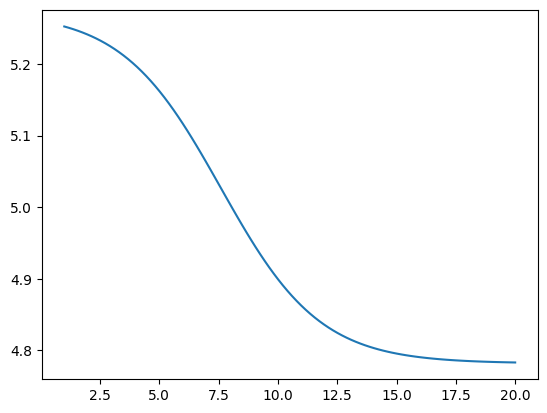

In [140]:
dists = np.linspace(1, 20, 100)

plt.plot(dists, f(dists, *popt_max))
plt.show()

In [147]:
dist = 3
time = "13:00"

v_max_d = f(dist, *popt_max)
v_null_d = f(dist, *popt_null)

t_max = dist / v_max_d * 1000
t_null = dist / v_null_d * 1000
a_val = 1400 / (t_null - t_max)**2

time_s = time_to_secs(time)
points = a_val * (time_s - t_null)**2
print(int(points))

897
